# Week 3 Assignment:  Practicing with NumPy + Matplolib via basic analysis and visualization of ARGO data 
### What is ARGO data?
- vertical profiles of pressure, temperature, salinity, etc. collected by a fleet of robotic instruments
- drift with the ocean currents, sinks and rises
- spend most of time under the surface! 
- the instruments collect extremely valuable data that helps us:
  - better estimate heat storage in the ocean (and thus sea level rise predictions)
  - better evaluate changes in salinity (and tie these to changes in global rainfall)

### Where is ARGO data collected?
![image.png](attachment:image.png)  
(Can't see this image?  Visit: https://fleetmonitoring.euro-argo.eu/dashboard )
  
### Where can we access ARGO data?
- nice outline of options for data access: https://argo.ucsd.edu/data/
    - Example: http://www.argodatamgt.org/


### Want more information on ARGO data?
- https://argo.ucsd.edu/about/
- https://youtu.be/PzHZdwaBr_Q (neat video about the journey of an ARGO float!)


### How are we using ARGO data in this assignment?
- data from a single "float" (instrument), collected between 2012-2014, as it journeys through the ocean - drifting and sinking and rising!
<br><br>
- **variables**: 
  - temperature (in degrees C)
  - salinity (saltiness; in psu)
  - pressure (weight of ocean above; in dbar)
  - latitude (deg N or S)
  - longitude (deg E or W)
  - date (remember that the float drifts with the ocean currents.... so each vertical profile of temperature, salinity, and pressure is associated with a given date/time and a given location - i.e., the latitude/longitude point) 
<br><br>
- **format**:  special NumPy array format - since you haven't learned much yet about reading in and working with data from Netcdf files (which is native format of current ARGO data)
  - note: when you read in the data from the file, it is a data object that contains multiple arrays
     - you'll find soon that this is analogous to data objects in Xarray (package we use for spatial data, especially that of Netcdf format)

#### (a.)
- import the NumPy package
- import the pyplot package from the Matplotlib package

In [1]:
# import the NumPy package
import numpy as np
# import the pyplot package from the Matplotlib package
import matplotlib.pyplot as plt

#### (b.)
- download the ARGO data from the Week 3 Assignment folder, 'argo_float_4901412.npz'

In [2]:
# Downloaded

#### (c.)
- load the data file (I'll do this for you!)

In [4]:
# np.load loads in data from a special NumPy array file format
data = np.load('argo_float_4901412.npz')

# These are the arrays contained in this data object
# Salinity, temperature, vertical levels in the ocean, longitude, date/time, pressure, and latitude in the order they appear 
print(data.files)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


#### (d.)
- extract the arrays shown in (c.) to NumPy array variables of the same name
  - *hint*: T = data['T'] to access each array within the 'data' data object - like a key for a dictionary
- print out the values of the latitude, longitude, and date variables

In [5]:
# extract the arrays shown in (c.) to NumPy array variables of the same name
# hint: T = data['T'] to access each array within the 'data' data object - like a key for a dictionary
S = data['S']
T = data['T']
levels = data['levels']
lon = data['lon']
date = data['date']
P = data['P']
lat = data['lat']

In [6]:
# print out the values of the latitude, longitude, and date variables
print(f"latitude: {lat}")
print(f"longitude: {lon}")
print(f"date: {date}")

latitude: [47.187 46.716 46.45  46.23  45.459 44.833 44.452 44.839 44.956 44.676
 44.13  43.644 43.067 42.662 42.513 42.454 42.396 42.256 42.089 41.944
 41.712 41.571 41.596 41.581 41.351 41.032 40.912 40.792 40.495 40.383
 40.478 40.672 41.032 40.864 40.651 40.425 40.228 40.197 40.483 40.311
 40.457 40.463 40.164 40.047 39.963 40.122 40.57  40.476 40.527 40.589
 40.749 40.993 41.162 41.237 41.448 41.65  42.053 42.311 42.096 41.683
 41.661 41.676 42.018 42.395 42.532 42.558 42.504 42.63  42.934 42.952
 42.777 42.722 42.601 42.457 42.379]
longitude: [-39.13  -37.282 -36.9   -36.89  -37.053 -36.658 -35.963 -35.184 -34.462
 -33.784 -32.972 -32.546 -32.428 -32.292 -32.169 -31.998 -31.824 -31.624
 -31.433 -31.312 -31.107 -31.147 -31.044 -31.14  -31.417 -31.882 -32.145
 -32.487 -32.537 -32.334 -32.042 -31.892 -31.861 -31.991 -31.883 -31.89
 -31.941 -31.889 -31.724 -31.412 -31.786 -31.561 -31.732 -31.553 -31.862
 -32.389 -32.318 -32.19  -32.224 -32.368 -32.306 -32.305 -32.65  -33.093
 -33.263

In [42]:
date.shape

(75,)

#### (e.)
- prove to yourself that each of the data structures is a NumPy array
- show me one example of this!

In [10]:
# prove to yourself that each of the data structures is a NumPy array
# show me one example of this!
# print type of S
print(f"type of S: {type(S)}")

type of S: <class 'numpy.ndarray'>


#### (f.)
- evaluate and print out the shape of S, T, P, lat, lon, and levels  
- *Note*: levels is UNITLESS
- from your above evaluations, please identify and name what the two dimensions of S, T, and P are (and tell me in a comment)

In [43]:
# evaluate and print out the shape of S, T, P, lat, lon, and levels
# Note: levels is UNITLESS
print(f"S shape: {S.shape}")
print(f"T shape: {T.shape}")
print(f"P shape: {P.shape}")
print(f"lat shape: {lat.shape}")
print(f"lon shape: {lon.shape}")
print(f"levels shape: {levels.shape}")

# from your above evaluations, please identify and name what the two dimensions of S, T, and P are (and tell me in a comment)
# Since the float drifts with the ocean currents, each vertical profile of temperature, salinity, and pressure is associated with a given date/time and a given location - i.e., the latitude/longitude point
# the two dimensions of S, T, and P are:
# 1. location - i.e., the latitude/longitude point
# 2. date/time

S shape: (78, 75)
T shape: (78, 75)
P shape: (78, 75)
lat shape: (75,)
lon shape: (75,)
levels shape: (78,)


#### (g.) evaluate/calculate and print:
- are there NaNs?
- if so, how many there are in each array (S, T, and P)
- how this compares to the total # of elements in each array (S, T, and P)
- the percent of NaNs in each array (S, T, and P) (relative to the total # of data points in each array)

In [14]:
# evaluate/calculate and print:
# are there NaNs?
print(f"NaNs in S: {np.isnan(S).any()}")
print(f"NaNs in T: {np.isnan(T).any()}")
print(f"NaNs in P: {np.isnan(P).any()}")

# if so, how many there are in each array (S, T, and P)
print(f"NaNs in S: {np.isnan(S).sum()}")
print(f"NaNs in T: {np.isnan(T).sum()}")
print(f"NaNs in P: {np.isnan(P).sum()}")

# how this compares to the total # of elements in each array (S, T, and P)
print(f"Total elements in S: {S.size}")
print(f"Total elements in T: {T.size}")
print(f"Total elements in P: {P.size}")

# the percent of NaNs in each array (S, T, and P) (relative to the total # of data points in each array)
print(f"Percent of NaNs in S: {np.isnan(S).sum()/S.size}")
print(f"Percent of NaNs in T: {np.isnan(T).sum()/T.size}")
print(f"Percent of NaNs in P: {np.isnan(P).sum()/P.size}")


NaNs in S: True
NaNs in T: True
NaNs in P: True
NaNs in S: 101
NaNs in T: 101
NaNs in P: 91
Total elements in S: 5850
Total elements in T: 5850
Total elements in P: 5850
Percent of NaNs in S: 0.017264957264957265
Percent of NaNs in T: 0.017264957264957265
Percent of NaNs in P: 0.015555555555555555


#### (h.) calculate and print the maximum and minimum value of each array (S, T, and P), over ALL depths and ALL latitude/longitude points

In [15]:
# calculate and print the maximum and minimum value of each array (S, T, and P), over ALL depths and ALL latitude/longitude points
print(f"Max S: {np.nanmax(S)}")
print(f"Min S: {np.nanmin(S)}")

Max S: 36.2849006652832
Min S: 34.89790344238281


In [16]:
print(f"Max T: {np.nanmax(T)}")
print(f"Min T: {np.nanmin(T)}")

Max T: 24.364999771118164
Min T: 3.5320000648498535


In [17]:
print(f"Max P: {np.nanmax(P)}")
print(f"Min P: {np.nanmin(P)}")

Max P: 2001.5
Min P: 0.30000001192092896


#### (i.) 
*Keep in mind that you've shown that S, T, and P are two dimensional variables and what each dimension is. Now:*
- create a line plot for each of these variables, initially just for the *first* latitude/longitude point in the dataset
   - we want the vertical axis of this plot to be the vertical levels in the ocean 
      - please reverse the vertical axis, so it reads, from top to bottom, 0 to 77, as the "higher" values of the 'level' variable are actually points *deeper* in the ocean
   - and the horizontal axis of this plot to be the quantity of interest
   - you must label both axises (including units - see start of assignment), and add a title 

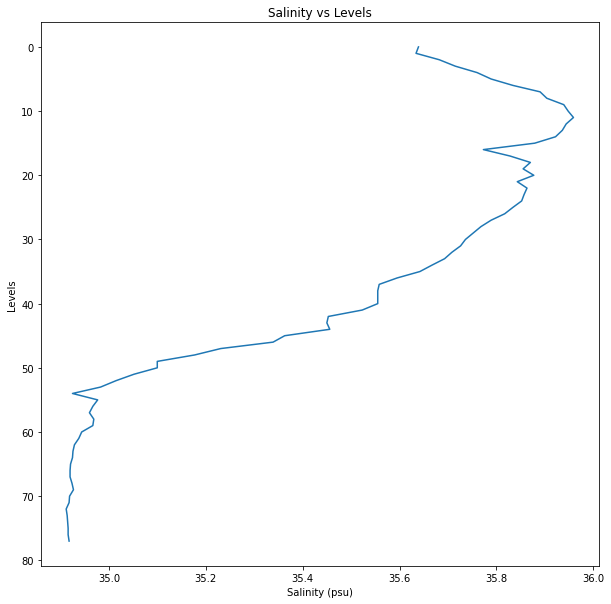

In [45]:
plt.figure(figsize=(10,10))
plt.plot(S[:, 0], levels)
plt.gca().invert_yaxis()
plt.xlabel('Salinity (psu)')
plt.ylabel('Levels')
plt.title('Salinity vs Levels')
plt.show()

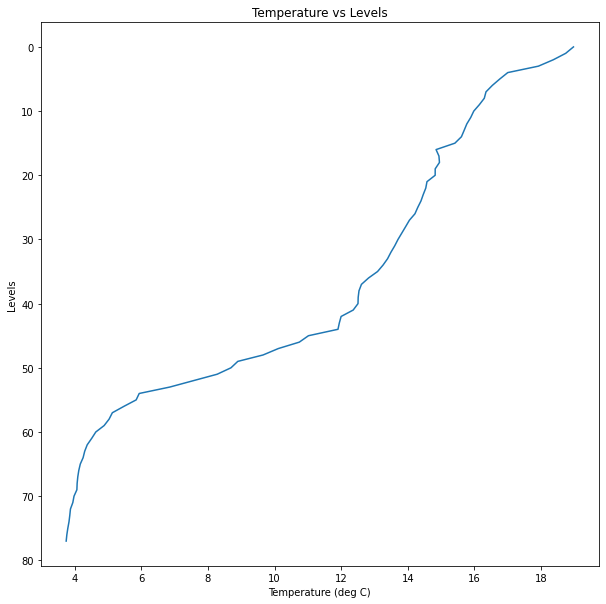

In [28]:
plt.figure(figsize=(10,10))
plt.plot(T[:, 0], levels)
plt.gca().invert_yaxis()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Levels')
plt.title('Temperature vs Levels')
plt.show()

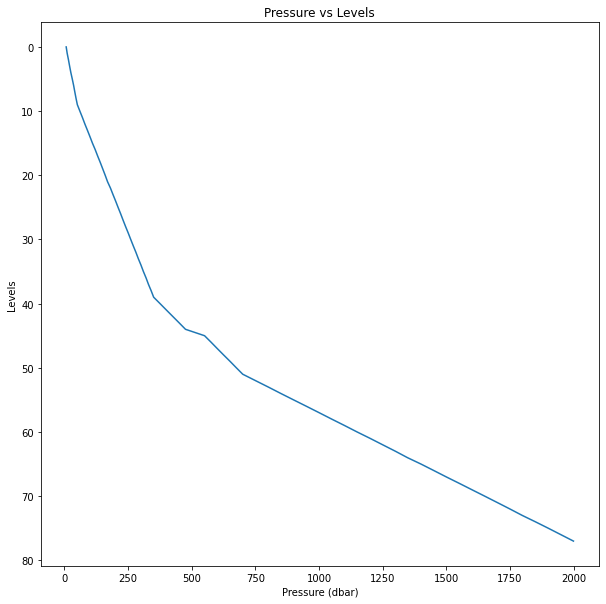

In [30]:
plt.figure(figsize=(10,10))
plt.plot(P[:, 0], levels)
plt.gca().invert_yaxis()
plt.xlabel('Pressure (dbar)')
plt.ylabel('Levels')
plt.title('Pressure vs Levels')
plt.show()

#### (j.) 
- now, let's take your plotting up a notch!
- you'll still create THREE plots in total, one for each S, P, and T
  - with appropriate titles, axis labels, etc.
<br><br>
- with vertical axis being levels (reversed) and horizontal axis being values of the given variable, like you did in (i.)
<br><br>
- but now you'll have many profiles on the same plot -- data of that variable collected at each and every lat/lon gridpoint contained in the dataset
   - no legends necessary
- there are multiple ways to do this
   - the simplest involves being clever in your line(s) of code that does the plotting 
<br><br>
- *option if you want to challenge yourself - ungraded*
  - instead, plot all three of the above-described plots on a single plot that consists of 3 subplots 

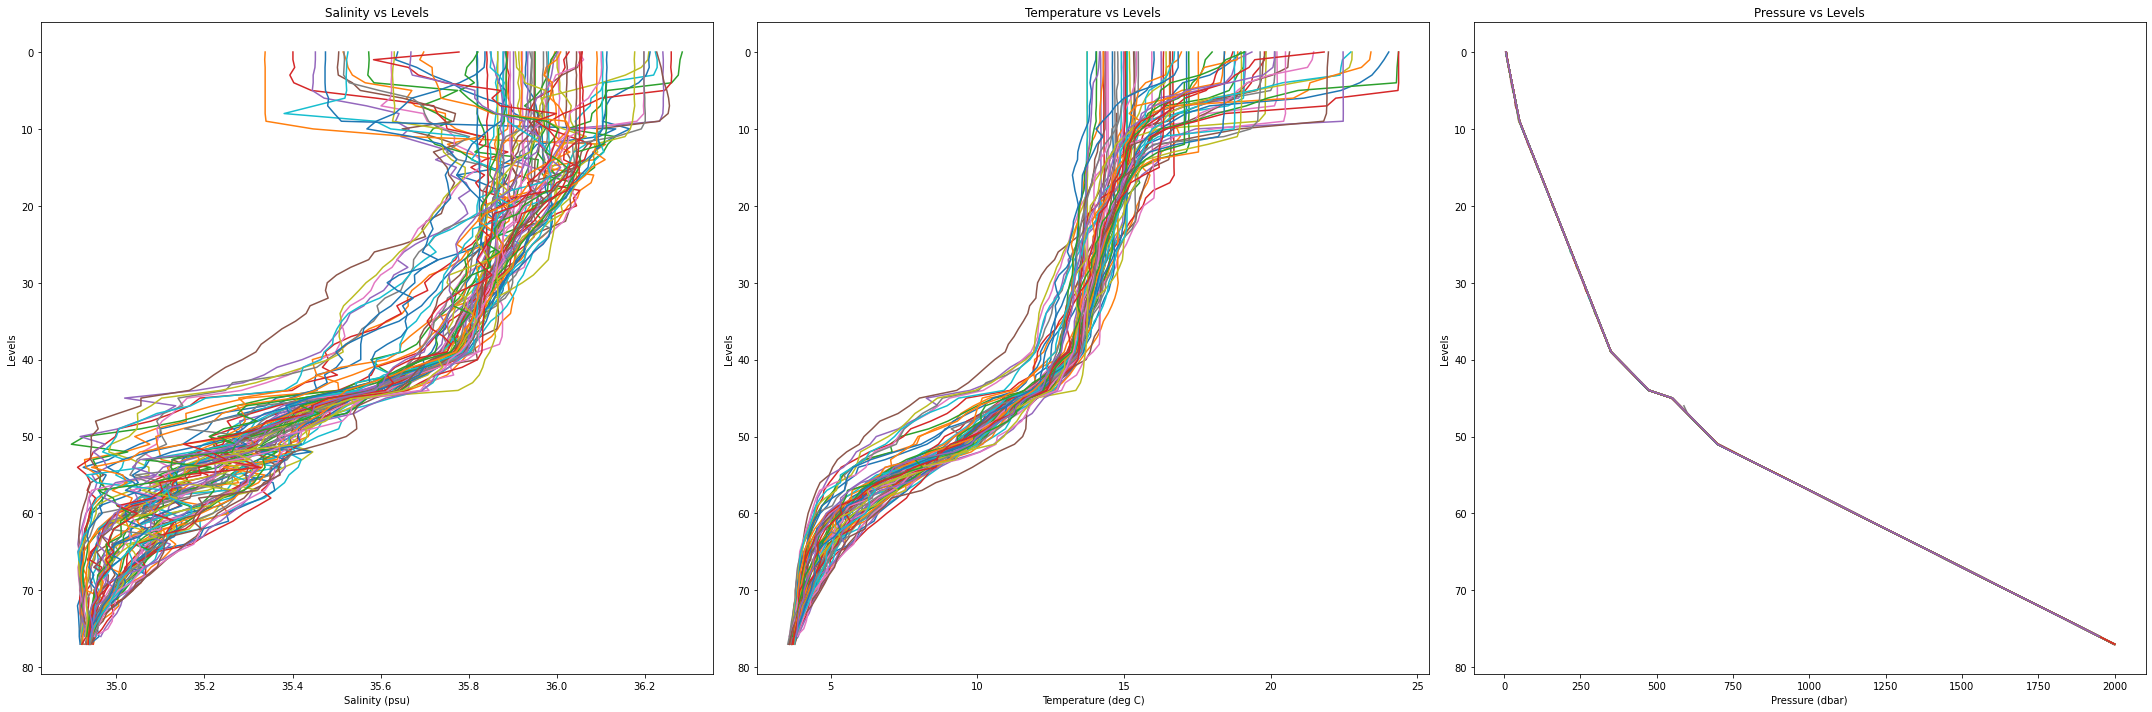

In [39]:
graph, (plot1, plot2, plot3) =plt.subplots(nrows=1, ncols=3, figsize=(30,10))
plot1.plot(S, levels)
plot1.invert_yaxis()
plot1.set_xlabel('Salinity (psu)')
plot1.set_ylabel('Levels')
plot1.set_title('Salinity vs Levels')

plot2.plot(T, levels)
plot2.invert_yaxis()
plot2.set_xlabel('Temperature (deg C)')
plot2.set_ylabel('Levels')
plot2.set_title('Temperature vs Levels')

plot3.plot(P, levels)
plot3.invert_yaxis()
plot3.set_xlabel('Pressure (dbar)')
plot3.set_ylabel('Levels')
plot3.set_title('Pressure vs Levels')

# tight layout
plt.tight_layout()


#### (k.)
Now, let's interpret the plots you produced in (j.)
<br><br>
- (a.) For each variable (so, for each plot) - **visually**, at which levels is there the greatest spread of values w/ location? 
<br><br>
- (b.) What formal, simple statisical metric could we use to quantiatively evaluate spread?
<br><br>
- (c.) Calculate spread at each height for each variable using this metric, and create a plot for each - so, a vertical profile of spread (x-axis) with depth (y-axis) for each variable - there'll be a SINGLE line on each plot, yes?

In [ ]:
# (a.) For each variable (so, for each plot) - visually, at which levels is there the greatest spread of values w/ location?
# Solution:
# Visually, for variable S, the greatest spread of values is at level 0, which is the surface level.
# Visually, for variable T, the greatest spread of values is at level 0, which is the surface level.
# Visually, for variable P, the greatest spread of values is quite difficult to determine, since 
####           the Pressure values range from 0 to 2000 dbar, and there are many different levels. But, By logic, the pressure should be more spread across
####           in the depths of the sea.


In [ ]:
# (b.) What formal, simple statisical metric could we use to quantiatively evaluate spread?
# solution: Interquartile range (IQR) could be used to quantify spread.


S_IQR Shape is (78,)


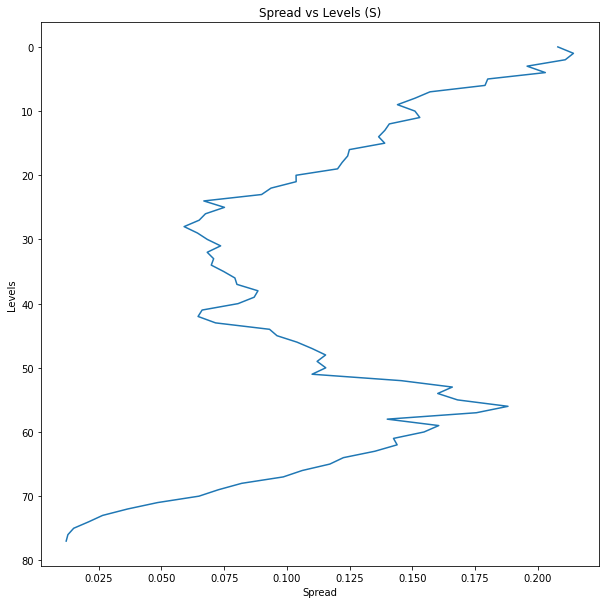

In [49]:
# (c.) Calculate spread at each height for each variable using this metric, and create a plot for each - 
# so, a vertical profile of spread (x-axis) with depth (y-axis) for each variable - there'll be a SINGLE line on each plot, yes? Yes.
# For S, get the IQR of the S array across axis 1 (the vertical axis), ignoring NaNs., 
# and then plot the IQR against the levels array.
S_IQR = np.nanpercentile(S, 75, axis=1) - np.nanpercentile(S, 25, axis=1)
print(f"S_IQR Shape is {S_IQR.shape}")
plt.figure(figsize=(10,10))
plt.plot(S_IQR, levels)
plt.gca().invert_yaxis()
plt.xlabel('Spread')
plt.ylabel('Levels')
plt.title('Spread vs Levels (S)')
plt.show()

T_IQR Shape is (78,)


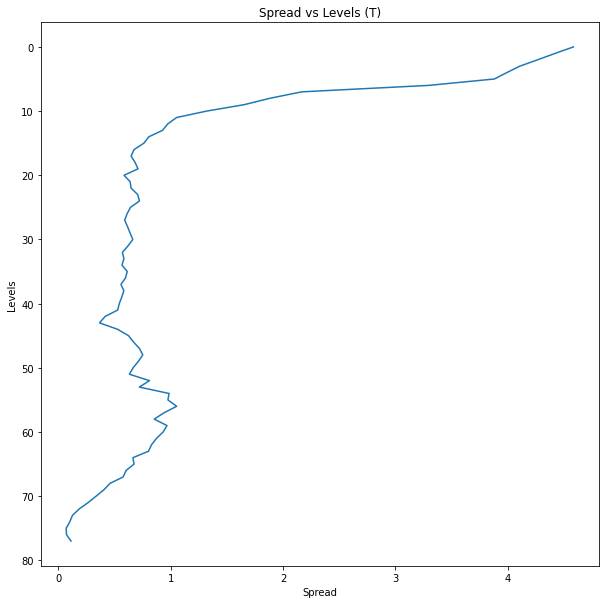

In [50]:
T_IQR = np.nanpercentile(T, 75, axis=1) - np.nanpercentile(T, 25, axis=1)
print(f"T_IQR Shape is {T_IQR.shape}")
plt.figure(figsize=(10,10))
plt.plot(T_IQR, levels)
plt.gca().invert_yaxis()
plt.xlabel('Spread')
plt.ylabel('Levels')
plt.title('Spread vs Levels (T)')
plt.show()

P_IQR Shape is (78,)


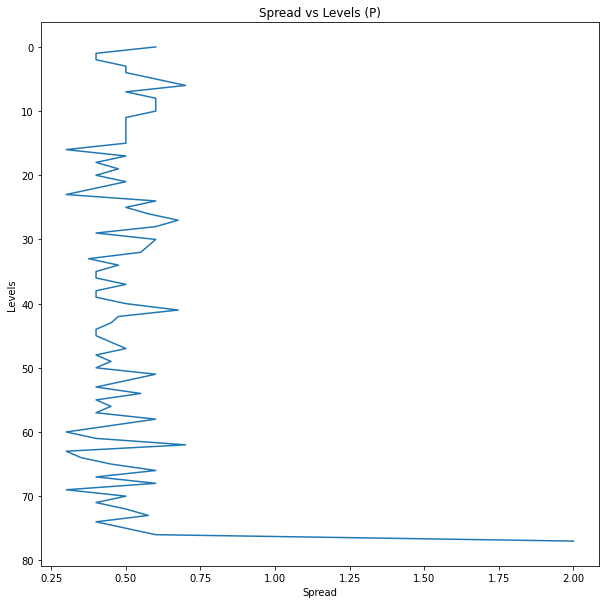

In [51]:
P_IQR = np.nanpercentile(P, 75, axis=1) - np.nanpercentile(P, 25, axis=1)
print(f"P_IQR Shape is {P_IQR.shape}")
plt.figure(figsize=(10,10))
plt.plot(P_IQR, levels)
plt.gca().invert_yaxis()
plt.xlabel('Spread')
plt.ylabel('Levels')
plt.title('Spread vs Levels (P)')
plt.show()

#### (l.)
- time to plot the locations where all these profiles were collected!
  - including axis labels!
- you haven't formally learned how to create a map yet, so simply use a scatter plot
<br><br>
- *options if you'd like to challenge yourself - ungraded*
  - know how to create maps?  plot this data on a map instead of scatter plot!
  - color-code the points by date!

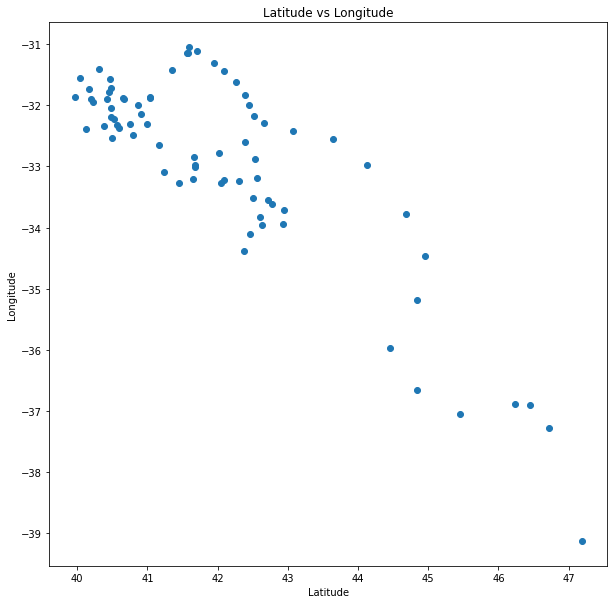

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(lat, lon)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.show()

In [61]:
# convert each value of date numpy array to a datetime object
import datetime
date = date.astype(datetime.datetime)

In [62]:
# Create a pandas dataframe with columns as lat, lon, date 
import pandas as pd
df = pd.DataFrame({'lat': lat, 'lon': lon, 'date': date})


In [65]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 50.3 MB/s 
     |████████████████████████████████| 6.3 MB 32.5 MB/s 


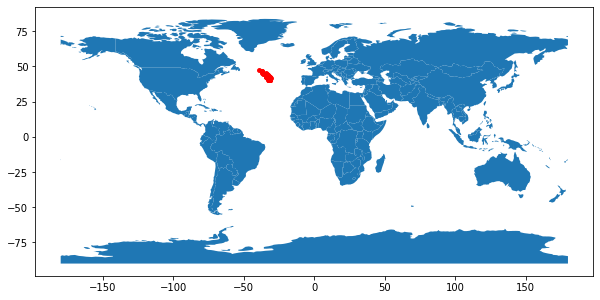

In [66]:
# options if you'd like to challenge yourself - ungraded
# know how to create maps? plot this data on a map instead of scatter plot!
# color-code the points by date!
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);



